In [1]:
import pandas as pd

import sys
sys.path.append('../scripts') 

from model_explainability import ModelExplainability

c:\Users\HP\Desktop\TenX\fraud-detection\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load processed data
fraud_data = pd.read_csv("../data/processed/processed_fraud_data.csv")
credit_data = pd.read_csv("../data/processed/processed_credit_data.csv")

In [3]:
# Separate features and targets for both datasets
X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']
X_credit = credit_data.drop(columns=['Class'])
y_credit = credit_data['Class']

In [3]:
# Number of samples to create
num_samples = 1000

# Separate features and targets for fraud dataset
X_fraud = fraud_data.drop(columns=['class']).sample(n=num_samples, random_state=42)
y_fraud = fraud_data['class'].sample(n=num_samples, random_state=42)

# Separate features and targets for credit dataset
X_credit = credit_data.drop(columns=['Class']).sample(n=num_samples, random_state=42)
y_credit = credit_data['Class'].sample(n=num_samples, random_state=42)

In [4]:
model_paths_fraud = {
    "Logistic Regression": "../models/fraud/logistic_regression_model.joblib",
    "Decision Tree": "../models/fraud/decision_tree_model.joblib",
    "Random Forest": "../models/fraud/random_forest_model.joblib",
    "Gradient Boosting": "../models/fraud/gradient_boosting_model.joblib",
    "MLP": "../models/fraud/mlp_model.joblib",
    "CNN": "../models/fraud/cnn_model.h5",
    "RNN": "../models/fraud/rnn_model.h5",
    "LSTM": "../models/fraud/lstm_model.h5"

}

model_paths_credit = {
    "Logistic Regression": "../models/credit/logistic_regression_model.joblib",
    "Decision Tree": "../models/credit/decision_tree_model.joblib",
    "Random Forest": "../models/credit/random_forest_model.joblib",
    "Gradient Boosting": "../models/credit/gradient_boosting_model.joblib",
    "MLP": "../models/credit/mlp_model.joblib",
    "CNN": "../models/credit/cnn_model.h5",
    "RNN": "../models/credit/rnn_model.h5",
    "LSTM": "../models/credit/lstm_model.h5"

}

In [5]:
# Initialize explainability classes for both datasets
explain_fraud = ModelExplainability(model_paths_fraud)
explain_credit = ModelExplainability(model_paths_credit)

SHAP Summary Plot for Logistic Regression on Fraud Data


100%|██████████| 1000/1000 [08:59<00:00,  1.85it/s]


SHAP values shape: (1000, 17)
X_train shape: (1000, 17)


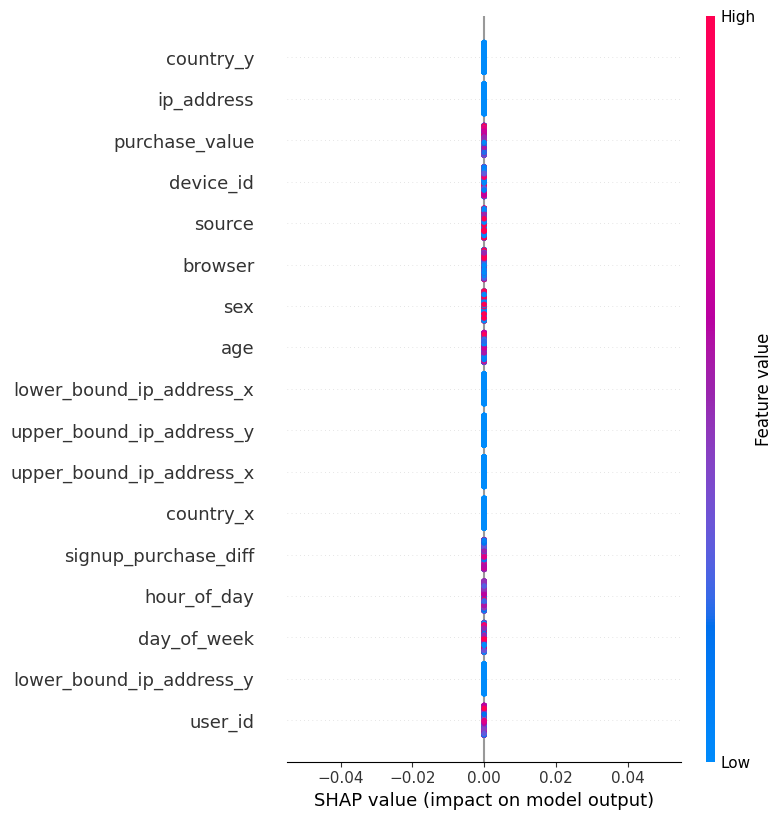

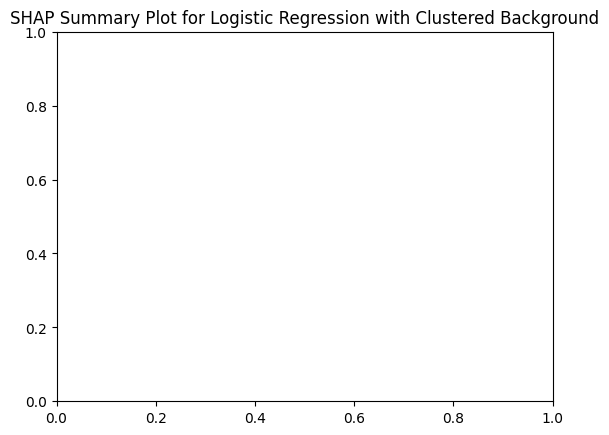

In [6]:
# SHAP summary plot for Logistic Regression on fraud_data
print("SHAP Summary Plot for Logistic Regression on Fraud Data")
explain_fraud.shap_summary_plot("Logistic Regression", X_fraud, num_clusters=100)

SHAP Force Plot for Random Forest on Credit Data (Index: 0)


100%|██████████| 1000/1000 [07:02<00:00,  2.37it/s]


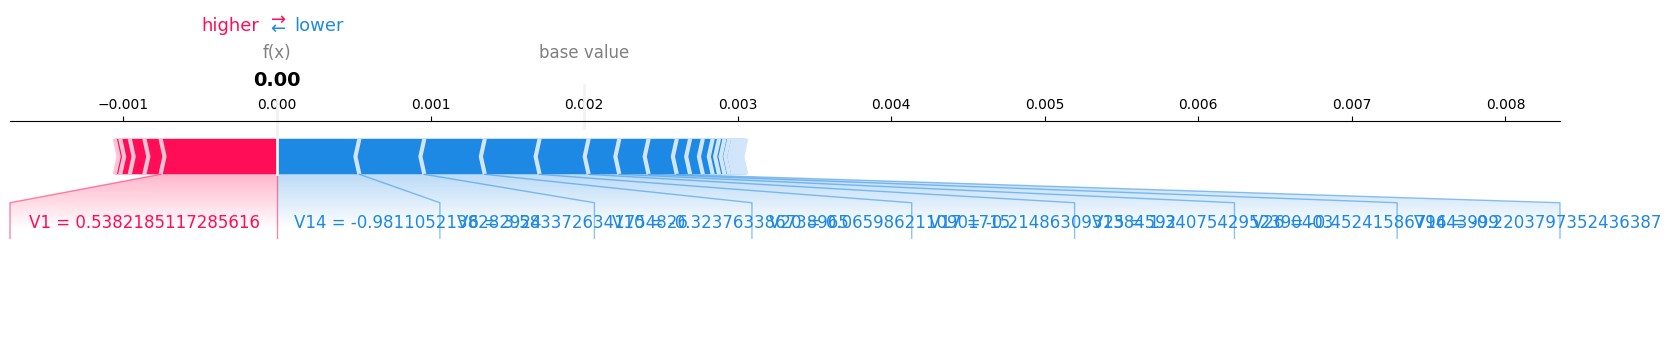

In [7]:
# SHAP force plot for Random Forest on credit_data (index 0 as example)
print("SHAP Force Plot for Random Forest on Credit Data (Index: 0)")
explain_credit.shap_force_plot("Decision Tree", X_credit, index=0)

SHAP Dependence Plot for Gradient Boosting on Fraud Data - Feature: 'purchase_value'


<Figure size 640x480 with 0 Axes>

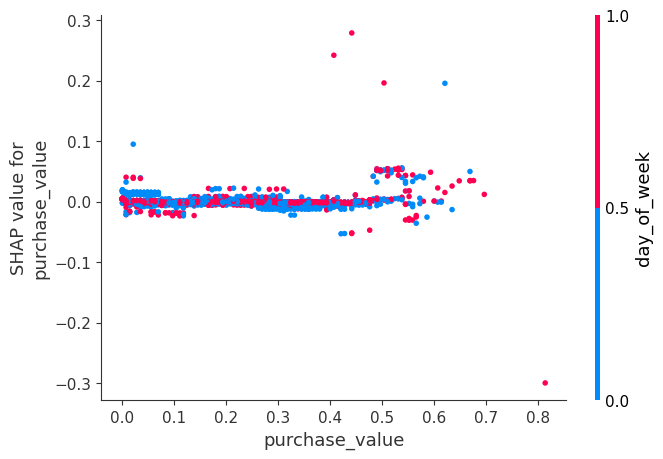

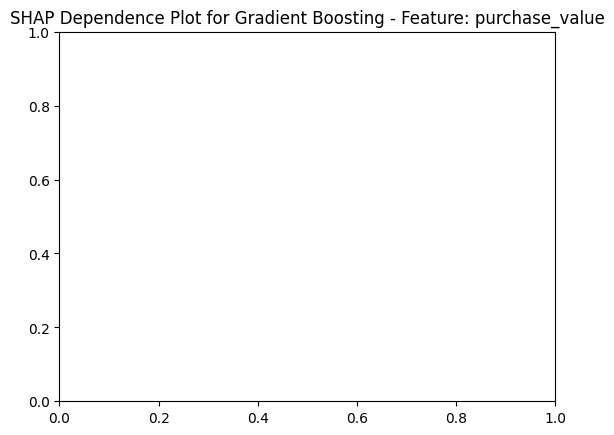

In [10]:
# SHAP dependence plot for Gradient Boosting on fraud_data (example feature 'amount')
print("SHAP Dependence Plot for Gradient Boosting on Fraud Data - Feature: 'purchase_value'")
explain_fraud.shap_dependence_plot("Gradient Boosting", X_fraud, feature='purchase_value')

In [10]:
# LIME explanation for Decision Tree on fraud_data (index 0 as example)
print("LIME Explanation for Decision Tree on Fraud Data (Index: 0)")
explain_fraud.lime_explanation("Decision Tree", X_fraud, index=0)

LIME Explanation for Decision Tree on Fraud Data (Index: 0)


c:\Users\HP\Desktop\TenX\fraud-detection\myenv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\Desktop\TenX\fraud-detection\myenv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\Desktop\TenX\fraud-detection\myenv\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co